# Deepak Raju Kori (2211AI05)

## Dataset

In [ ]:
!pip install -q datasets
from datasets import load_dataset
train_data = load_dataset("keivalya/MedQuad-MedicalQnADataset")
train_split = train_data['train']
train_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00


Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['qtype', 'Question', 'Answer'],
    num_rows: 16407
})

In [ ]:
import pandas as pd
# Assuming train_split is a list of dictionaries
df = pd.DataFrame(train_split)

In [ ]:
# Find duplicates based on all columns
duplicates = df[df.duplicated()]

# Display the duplicates
print("Duplicate Rows except first occurrence:")
duplicates.head(10)

Duplicate Rows except first occurrence:


,qtype,Question,Answer
1388,information,What is (are) Hypoglycemia ?,"Hypoglycemia, also called low blood glucose or..."
1390,symptoms,What are the symptoms of Hypoglycemia ?,Hypoglycemia causes symptoms such as\n ...
1392,causes,What causes Hypoglycemia ?,Diabetes Medications\n \nHypogl...
1395,treatment,What are the treatments for Hypoglycemia ?,Signs and symptoms of hypoglycemia vary from p...
1596,treatment,What are the treatments for Acromegaly ?,"Currently, treatment options include surgical ..."
1704,causes,What causes Causes of Diabetes ?,Other types of diabetes have a variety of poss...
1717,information,What is (are) Renal Tubular Acidosis ?,Renal tubular acidosis (RTA) is a disease that...
1719,exams and tests,How to diagnose Renal Tubular Acidosis ?,"To diagnose RTA, doctors check the acid-base b..."
1721,information,What is (are) Renal Tubular Acidosis ?,Type 1: Classical Distal RTA\n ...
1723,considerations,What to do for Renal Tubular Acidosis ?,- Renal tubular acidosis (RTA) is a disease th...


In [ ]:
df.head(3)

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...


## Data Preprocessing

1. Text cleaning (removing special characters, lowercasing)


In [ ]:
import re
removed_chars_list = []
def clean_text(text):
    non_alphanumeric_chars = re.findall(r'[^A-Za-z\s]', text)

    # Add the removed special characters to the list
    removed_chars_list.extend(non_alphanumeric_chars)

    # Lowercasing
    text = text.lower()
    # Remove special characters

    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text

# Apply the cleaning function to each column
df['qtype'] = df['qtype'].apply(clean_text)
df['Question'] = df['Question'].apply(clean_text)
df['Answer'] = df['Answer'].apply(clean_text)

In [ ]:
print("Length of Removed Characters List:", len(removed_chars_list))

# Convert the list to a set to get unique elements
unique_removed_chars = set(removed_chars_list)
print("Length of unique removed chars:", len(unique_removed_chars))
# Print the unique special characters
print("Unique Removed Special Characters:", unique_removed_chars)


Length of Removed Characters List: 681112
Length of unique removed chars: 56
Unique Removed Special Characters: {'6', '8', '`', '[', ':', '.', '&', '?', '®', '(', ';', "'", '/', '+', '_', '7', 'ñ', '<', '!', '5', '1', '"', '%', '–', '$', '\\', '~', '3', '{', '—', 'ī', '@', ']', '’', '*', '9', '#', '“', 'é', '…', '°', ')', '>', '-', 'µ', '0', '”', '−', '}', '¼', ',', '4', 'ō', '≥', '=', '2'}


2) Handling Missing Values and Duplicates

In [ ]:
nan_counts = df.isna().sum()

# Display the counts
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
qtype       0
Question    0
Answer      0
dtype: int64


### Exploratory Data Analysis (EDA)

In [ ]:
# Now you can use value_counts
unique_qtypes = df['qtype'].value_counts()

# Display the result
print("Unique qtype values and their counts:")
print(unique_qtypes)

Unique qtype values and their counts:
information        4535
symptoms           2748
treatment          2442
inheritance        1446
frequency          1120
genetic changes    1087
causes              727
exams and tests     653
research            395
outlook             361
susceptibility      324
considerations      235
prevention          210
stages               77
complications        46
support groups        1
Name: qtype, dtype: int64


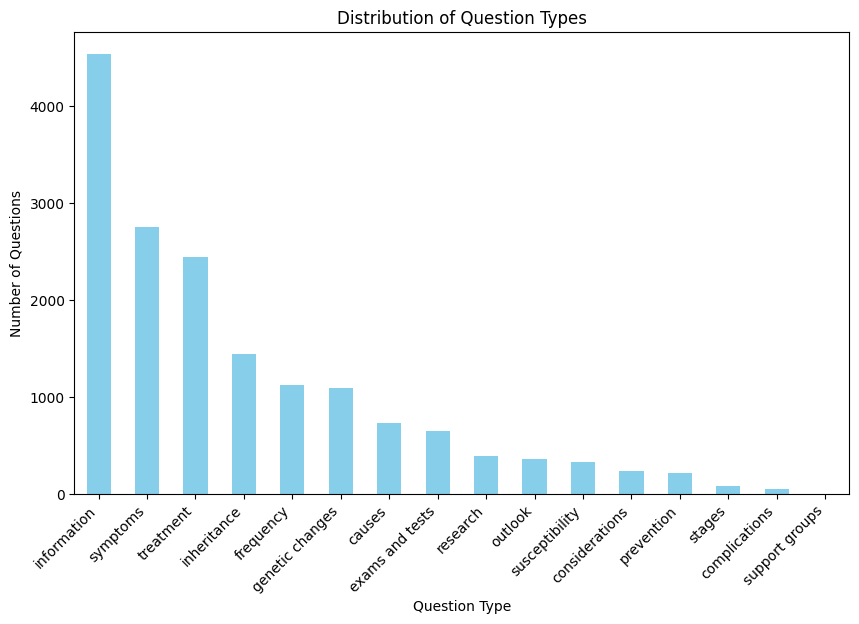

Unique Question Types: ['susceptibility' 'symptoms' 'exams and tests' 'treatment' 'prevention'
 'information' 'frequency' 'complications' 'causes' 'research' 'outlook'
 'considerations' 'inheritance' 'stages' 'genetic changes'
 'support groups']


In [ ]:
import matplotlib.pyplot as plt
# Check the unique values in the 'qtype' column
unique_qtypes = df['qtype'].unique()

# Display the distribution of question types
qtype_distribution = df['qtype'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
qtype_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the unique question types
print("Unique Question Types:", unique_qtypes)

In [ ]:
# Calculate the length of each answer in terms of words
df['Question_Length_Words'] = df['Question'].astype(str).str.split().apply(len)
df['Answer_Length_Words'] = df['Answer'].astype(str).str.split().apply(len)
df.head(2)

,qtype,Question,Answer,Question_Length_Words,Answer_Length_Words
0,susceptibility,who is at risk for lymphocytic choriomeningiti...,lcmv infections can occur after exposure to fr...,8,68
1,symptoms,what are the symptoms of lymphocytic choriomen...,lcmv is most commonly recognized as causing ne...,8,365


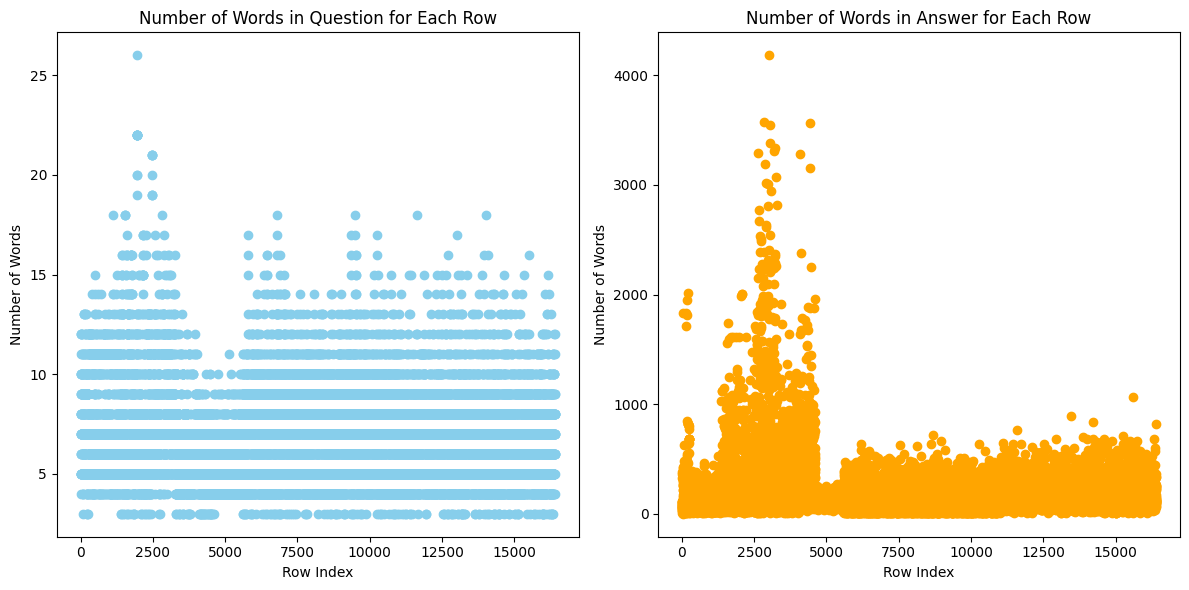

In [ ]:
# Assuming df is your DataFrame with 'Question_Length_Words' and 'Answer_Length_Words' columns
plt.figure(figsize=(12, 6))

# Scatter plot for Question lengths
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['Question_Length_Words'], color='skyblue')
plt.title('Number of Words in Question for Each Row')
plt.xlabel('Row Index')
plt.ylabel('Number of Words')

# Scatter plot for Answer lengths
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['Answer_Length_Words'], color='orange')
plt.title('Number of Words in Answer for Each Row')
plt.xlabel('Row Index')
plt.ylabel('Number of Words')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
mean_words_question = df['Question_Length_Words'].mean()
mean_words_answer = df['Answer_Length_Words'].mean()

print(f"Mean words per row in 'Question' column: {mean_words_question}")
print(f"Mean words per row in 'Answer' column: {mean_words_answer}")


Mean words per row in 'Question' column: 7.170415066739806
Mean words per row in 'Answer' column: 194.84244529773878


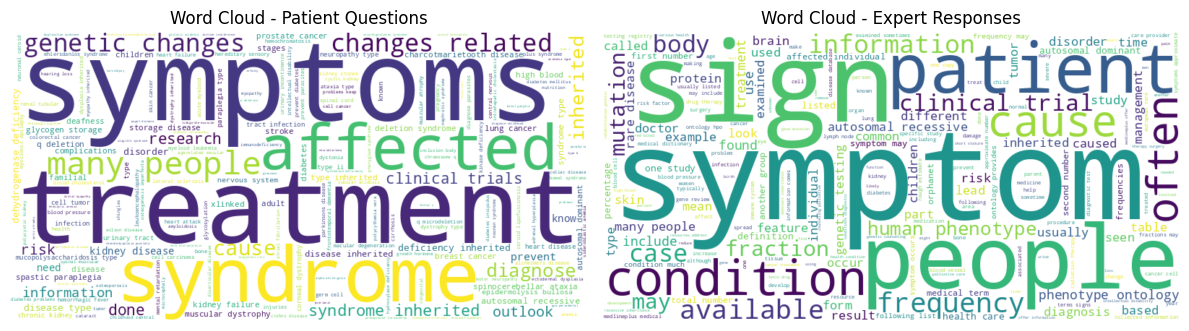

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all strings for word clouds
patient_questions = df['Question'].dropna().str.lower().str.cat(sep=' ')
expert_responses = df['Answer'].dropna().str.lower().str.cat(sep=' ')

# Generate word clouds for patient questions and expert responses
wordcloud_patient = WordCloud(width=800, height=400, background_color='white').generate(patient_questions)
wordcloud_expert = WordCloud(width=800, height=400, background_color='white').generate(expert_responses)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_patient, interpolation='bilinear')
plt.title('Word Cloud - Patient Questions')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_expert, interpolation='bilinear')
plt.title('Word Cloud - Expert Responses')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Drop the specified columns
df = df.drop(['qtype', 'Question_Length_Words', 'Answer_Length_Words'], axis=1)

# Display the modified DataFrame
df


,Question,Answer
0,who is at risk for lymphocytic choriomeningiti...,lcmv infections can occur after exposure to fr...
1,what are the symptoms of lymphocytic choriomen...,lcmv is most commonly recognized as causing ne...
2,who is at risk for lymphocytic choriomeningiti...,individuals of all ages who come into contact ...
3,how to diagnose lymphocytic choriomeningitis lcm,during the first phase of the disease the most...
4,what are the treatments for lymphocytic chorio...,aseptic meningitis encephalitis or meningoence...
...,...,...
16402,what are the symptoms of familial visceral myo...,what are the signs and symptoms of familial vi...
16403,what is are pseudopelade of brocq,pseudopelade of brocq pbb is a slowly progress...
16404,what are the symptoms of pseudopelade of brocq,what are the signs and symptoms of pseudopelad...
16405,what are the treatments for pseudopelade of br...,is there treatment or a cure for pseudopelade ...


## Splitting the data into training and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train, dev, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Display the shapes of the resulting DataFrames
print("Train set shape:", train_df.shape)
print("Dev set shape:", dev_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (13125, 2)
Dev set shape: (1641, 2)
Test set shape: (1641, 2)


In [ ]:
from datasets import Dataset, DatasetDict

# Assuming train_df, dev_df, and test_df are your DataFrames
train_df.reset_index(drop=True, inplace=True)
dev_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Convert DataFrames to Datasets
train_data = Dataset.from_pandas(train_df)
dev_data = Dataset.from_pandas(dev_df)
test_data = Dataset.from_pandas(test_df)

# Create a DatasetDict with 'train', 'dev', and 'test' keys
dataset_dict = DatasetDict({"train": train_data, "dev": dev_data, "test": test_data})

# Display the dataset_dict
print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['Question', 'Answer'],
        num_rows: 13125
    })
    dev: Dataset({
        features: ['Question', 'Answer'],
        num_rows: 1641
    })
    test: Dataset({
        features: ['Question', 'Answer'],
        num_rows: 1641
    })
})


In [ ]:
# Print the first 5 rows of the 'train' dataset
train_data = dataset_dict['train']
print(train_data[:1])

# Print the first 5 rows of the 'dev' dataset
dev_data = dataset_dict['dev']
print(dev_data[:1])

# Print the first 5 rows of the 'test' dataset
test_data = dataset_dict['test']
print(test_data[:5])

{'Question': ['what is are treatment methods for kidney failure peritoneal dialysis '], 'Answer': ['peritoneal dialysis is a treatment for kidney failure that uses the lining of your abdomen or belly to filter your blood inside your body doctors call this lining the peritoneum a doctor will place a soft tube called a catheter in your belly a few weeks before you start treatment\n                \nwhen you start peritoneal dialysis dialysis solutionwater with salt and other additivesflows from a bag through the catheter into your belly when the bag is empty you can disconnect your catheter from the bag and cap it so you can move around and do your normal activities while the dialysis solution is inside your belly it soaks up wastes and extra fluid from your body after a few hours you drain the used dialysis solution into a drain bag you can then dispose of the used dialysis solution which is now full of wastes and extra fluid in a toilet or down the drain of a sink or bathtub then you s

## Train/Fine-tune on given domain-specific dataset.

In [ ]:
!pip install -q peft
!pip install -q accelerate
!pip install -q bitsandbytes
!pip install -q --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 22.9 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config)

tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    model_max_length=512,
    padding_side="left",
    add_eos_token=True)

tokenizer.pad_token = tokenizer.eos_token #different lengths equal

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [ ]:
train_data

Dataset({
    features: ['Question', 'Answer'],
    num_rows: 13125
})

In [ ]:
def generate_prompt(data_point):
  return f"""
<human>: {data_point["Question"]}
<assistant>: {data_point["Answer"]}
""".strip()

def generate_and_tokenize_prompt(data_point):
  full_prompt = generate_prompt(data_point)
  tokenized_full_prompt = tokenizer(full_prompt, padding=True, truncation=True)
  return tokenized_full_prompt

train_data = train_data.shuffle().map(generate_and_tokenize_prompt)
dev_data = dev_data.shuffle().map(generate_and_tokenize_prompt)
test_data = test_data.shuffle().map(generate_and_tokenize_prompt)


Map:   0%|          | 0/13125 [00:00<?, ? examples/s]

Map:   0%|          | 0/1641 [00:00<?, ? examples/s]

Map:   0%|          | 0/1641 [00:00<?, ? examples/s]

In [ ]:
train_data

Dataset({
    features: ['Question', 'Answer', 'input_ids', 'attention_mask'],
    num_rows: 13125
})

In [ ]:
def print_trainable_parameters(model):
  """
  Prints the number of trainable parameters in the model.
  """
  trainable_params = 0
  all_param = 0
  for _, param in model.named_parameters():
    all_param += param.numel()
    if param.requires_grad:
      trainable_params += param.numel()
  print(
      f"trainable params: {trainable_params} || all params: {all_param} || trainables%: {100 * trainable_params / all_param}"
  )

In [ ]:
from peft import LoraConfig

config = LoraConfig(
    r=64,
    lora_dropout=0.1,
    lora_alpha=16,
    bias="none",
    task_type="CAUSAL_LM",  # Adjust task type if needed
)

In [ ]:
model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 27262976 || all params: 3779334144 || trainables%: 0.7213698223345028


In [ ]:
from peft import (
    LoraConfig,
    PeftConfig,
    PeftModel,
    get_peft_model,
    prepare_model_for_kbit_training
)

In [ ]:
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
    Trainer,
    DataCollatorForLanguageModeling
)

In [ ]:
training_args = TrainingArguments(
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    learning_rate=2e-4,
    fp16=True,
    save_total_limit=3,
    logging_steps=1,
    output_dir="/content",
    # evaluation_strategy="steps",  # Evaluate every `eval_steps` steps
    # eval_steps=5,  # Adjust based on your preference
    max_steps=100,
    optim="paged_adamw_8bit",
    lr_scheduler_type="cosine",
    warmup_ratio=0.05,
    report_to="tensorboard",
)

In [ ]:
trainer = Trainer(
    model=model,
    train_dataset=train_data,
    # eval_dataset=dev_data,
    args=training_args,
    data_collator= DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

In [ ]:
model.config.use_cache = False
trainer.train()

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
1,1.924000
2,2.119800
3,2.166100
4,1.981100
5,1.972700
6,1.517200
7,1.782000
8,2.041600
9,1.863100
10,1.628700


TrainOutput(global_step=100, training_loss=1.3250222647190093, metrics={'train_runtime': 476.1241, 'train_samples_per_second': 0.84, 'train_steps_per_second': 0.21, 'total_flos': 4252817393836032.0, 'train_loss': 1.3250222647190093, 'epoch': 0.03})

In [ ]:
model.save_pretrained("/content")

## Pushing model to Huggingface

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
from huggingface_hub import notebook_login, login

In [ ]:
token=userdata.get('token')

In [ ]:
login(token=token)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
model.push_to_hub(
    "eepakkori45/Mistal_bestt", use_auth_token=True
)

adapter_model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Deepakkori45/Deepak_100_Mistral-7B-v0.1/commit/669bb65c57bfa442d6f78a39afddd1272b483060', commit_message='Upload model', commit_description='', oid='669bb65c57bfa442d6f78a39afddd1272b483060', pr_url=None, pr_revision=None, pr_num=None)

## Loading My fine-Tuned model from huggingface

In [ ]:
!pip install -q peft
!pip install -q bitsandbytes
!pip install -q accelerate

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import (
    LoraConfig,
    PeftConfig,
    PeftModel,
    get_peft_model,
    prepare_model_for_kbit_training
)

In [ ]:
PEFT_MODEL = "Deepakkori45/Mistal_best"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
config = PeftConfig.from_pretrained(PEFT_MODEL)
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    return_dict=True,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True,
)

tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path)
tokenizer.pad_token = tokenizer.eos_token

model = PeftModel.from_pretrained(model, PEFT_MODEL)

adapter_config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

In [ ]:
generation_config = model.generation_config
generation_config.max_new_tokens = 210 #Avg length of Answer of input
generation_config.temperature = 0.7
generation_config.top_p = 0.7
generation_config.num_return_sequences = 1
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eos_token_id = tokenizer.eos_token_id
generation_config.do_sample = True  # Adjust based on your preference for sampling

## Results by fine tuned model

In [ ]:
test_data

Dataset({
    features: ['Question', 'Answer'],
    num_rows: 1641
})

In [ ]:
%%time
device = "cuda:0"

prompt = """
<human>: what are the symptoms of headache?
<assistant>:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

tokenizer.decode(outputs[0], skip_special_tokens=True)

CPU times: user 23.9 s, sys: 250 ms, total: 24.2 s
Wall time: 24.6 s


'<human>: what are the symptoms of headache?\n<assistant>: headache can be a symptom of many conditions and may be a symptom of a serious condition such as meningitis or a brain tumor the symptoms of headache can vary from person to person and depend on the underlying cause of the headache the symptoms of headache can include pain that is throbbing or constant pain that is located on one side or both sides of the head pain that is worse with activity such as walking or bending over pain that is worse in the morning or at night pain that is triggered by certain activities such as coughing or straining pain that is made worse by movement pain that is made worse by lying down pain that is made worse by physical activity such as walking or bending over pain that is made worse by straining pain that is made worse by coughing pain that is made worse by light or sound pain that is made worse by odors or smells pain that is made worse by exertion pain that is made worse by eating pain that is 

In [ ]:
%%time
device = "cuda:0"

prompt = """
<human>: what can i do to prevent poisoning by marine toxins?
<assistant>:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

tokenizer.decode(outputs[0], skip_special_tokens=True)

CPU times: user 30.8 s, sys: 254 ms, total: 31 s
Wall time: 41.3 s


'<human>: {what can i do to prevent poisoning by marine toxins?}\n<assistant>: {how can i prevent poisoning by marine toxins?}   the best way to prevent poisoning by marine toxins is to avoid eating shellfish that may be contaminated   if you eat shellfish that may be contaminated the following precautions may reduce your risk of illness   cook shellfish thoroughly   avoid eating shellfish that have a strong fishy odor   discard shellfish that are not fresh   avoid eating shellfish during a marine toxin outbreak   if you are a commercial fisherman or shellfish harvester the following precautions may reduce your risk of exposure to marine toxins   avoid eating shellfish from areas where marine toxin outbreaks have been reported   avoid eating shellfish from areas where there are large concentrations of shellfish   avoid eating shellfish that are not fresh   avoid eating shellfish that are not properly cooked   avoid eating shellfish that have a strong fishy odor   avoid eating shellfish

In [ ]:
%%time
device = "cuda:0"

prompt = """
<human>: what can i do to prevent from Covid-19?
<assistant>:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

tokenizer.decode(outputs[0], skip_special_tokens=True)

CPU times: user 24.9 s, sys: 245 ms, total: 25.2 s
Wall time: 27.4 s


'<human>: what can i do to prevent from Covid-19?\n<assistant>: there is currently no vaccine to prevent covid-9 infection the best way to prevent infection is to avoid being exposed to the virus avoid close contact with people who are sick and practice social distancing stay at least 6 feet away from other people even if you feel well keep it short and keep it outdoors if you are sick stay home and keep away from others if you have a fever cough or shortness of breath seek medical care early if you think you have been exposed to covid-9 or have a fever cough or shortness of breath call your healthcare provider for medical advice and do not go to the doctor or emergency room without first calling for guidance if you are sick to help slow the spread of covid-9 to others if you are sick with covid-9 or think you might have it stay home except to get medical care do not go to work school or public areas do not use public transportation or taxis avoid contact with other people and animals 

In [ ]:
device = "cuda:0"  # or "cpu" if you're running on CPU

def generate_prediction(prompt):
    combined_prompt = f"""<human>:{prompt} \n <assistant>:""".strip()
    encoding = tokenizer(combined_prompt, return_tensors="pt").to(device)
    with torch.inference_mode():
        outputs = model.generate(
            input_ids=encoding.input_ids,
            attention_mask=encoding.attention_mask,
            generation_config=generation_config
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)
# Assuming test_df has 'input_ids' and 'attention_mask' columns as lists

test_df = pd.DataFrame(test_data)
test_df = test_df[:30]

# Applying the generation function to the 'Question' column in the test_data
test_df['Predicted_Answer'] = test_df['Question'].apply(generate_prediction)

# Saving the results to a CSV file
result_df = pd.DataFrame({
    'Question': test_df['Question'],
    'Answer': test_df['Answer'],
    'Predicted_Answer': test_df['Predicted_Answer']
})


In [ ]:
for i in result_df["Predicted_Answer"][5]:
  print(i)

<human>:how to diagnose peripheral artery disease  
 <assistant>:peripheral artery disease is diagnosed based on the presence of symptoms and the results of physical examination and diagnostic tests  the most common diagnostic test is an anklebrachial index  an anklebrachial index is a comparison of the blood pressure in the ankle and the blood pressure in the arm  the anklebrachial index is calculated by dividing the systolic blood pressure in the ankle by the systolic blood pressure in the arm  a normal anklebrachial index is greater than 100  an anklebrachial index of 090 or less is considered abnormal  other diagnostic tests that may be used to diagnose peripheral artery disease include ultrasound angiography and magnetic resonance angiography  these tests use sound waves or magnetic fields to create images of the blood vessels  these tests can help to identify the location and extent of blockages in the arteries  peripheral artery disease may also be diagnosed during a procedure c

In [ ]:
result_df.to_csv('FFFFFF.csv', index=False)

In [ ]:
%%time
device = "cuda:0"

prompt = """
<human>: What is (are) Parasites - Trichuriasis (also known as Whipworm Infection) ?
<assistant>:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

tokenizer.decode(outputs[0], skip_special_tokens=True)

CPU times: user 24.1 s, sys: 316 ms, total: 24.4 s
Wall time: 35 s


'<human>: What is (are) Parasites - Trichuriasis (also known as Whipworm Infection) ?\n<assistant>: Parasites - Trichuriasis (also known as Whipworm Infection) is a parasitic infection of the large intestine caused by the parasite Trichuris trichiura it is one of the most common parasitic infections in the world and is found in tropical and subtropical regions of the world it is more common in warm and humid climates and in areas with poor sanitation and hygiene it is most common in children and young adults and is usually acquired through the ingestion of contaminated food or water or by contact with contaminated soil or sand the most common symptoms of trichuriasis are abdominal pain diarrhea and constipation in severe cases the parasites can cause intestinal bleeding and perforation of the intestine which can be life threatening the most effective treatment for trichuriasis is albendazole or mebendaz'

In [ ]:
%%time
device = "cuda:0"

prompt = """
<human>: Who is Rohit Sharma?
<assistant>:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

tokenizer.decode(outputs[0], skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


CPU times: user 22.5 s, sys: 236 ms, total: 22.7 s
Wall time: 24.9 s


'<human>: Who is Rohit Sharma?\n<assistant>: Rohit sharma is an indian cricketer who plays for mumbai in domestic cricket and for mumbai indians in the indian premier league he is the current captain of the indian national team in t20is and the vice captain of the odi team he made his international debut in 2007 and has since become one of the most successful batsmen in the world he is the only batsman to score four double centuries in odi cricket and is the only batsman to score three double centuries in test cricket he is also the only batsman to score a double century in all three formats of the game he is the first batsman to score a double century in an odi match and the first batsman to score a double century in a test match in india he is the first batsman to score a double century in a test match in india he is the first batsman to score a double'

## Results by Baseline Model

In [ ]:
!pip install -q peft
!pip install -q accelerate
!pip install -q bitsandbytes
!pip install -q --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_name = "mistralai/Mistral-7B-v0.1"

compute_dtype = getattr(torch, "float16")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=False,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
model.config.use_cache = False
model.config.pretraining_tp = 1

tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          trust_remote_code=True,
                                         )
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

In [ ]:
generation_config = model.generation_config
generation_config.max_new_tokens = 200 #Avg length of Answer of input
generation_config.temperature = 0.7
generation_config.top_p = 0.7
generation_config.num_return_sequences = 1
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eos_token_id = tokenizer.eos_token_id
generation_config.do_sample = True  # Adjust based on your preference for sampling

In [ ]:
%%time
device = "cuda:0"

prompt = """
<Question>: {what are the symptoms of cancer?}
<Answer>:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config,
      num_return_sequences=1  # Set this to 1
  )

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

<Question>: {what are the symptoms of cancer?}
<Answer>: {cancer is a disease that can be caused by many factors, including genetic factors, environmental factors, and lifestyle factors. the symptoms of cancer can vary depending on the type of cancer and the stage of the disease. some common symptoms of cancer include:

- unexplained weight loss
- fatigue
- fever
- night sweats
- unexplained pain
- unexplained bleeding
- unexplained bruising
- unexplained
CPU times: user 8.9 s, sys: 33.1 ms, total: 8.93 s
Wall time: 9.42 s


<Question>: {what are the symptoms of cancer?}
<Answer>: {cancer is a disease that can be caused by many factors, including genetic factors, environmental factors, and lifestyle factors. the symptoms of cancer can vary depending on the type of cancer and the stage of the disease. some common symptoms of cancer include:

- unexplained weight loss
- fatigue
- fever
- night sweats
- unexplained pain
- unexplained bleeding
- unexplained bruising
- unexplained

In [ ]:
%%time
device = "cuda:0"

prompt = """
Question: {what are the symptoms of headache?}
Answer:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

tokenizer.decode(outputs[0], skip_special_tokens=True)

CPU times: user 8.62 s, sys: 13.3 ms, total: 8.63 s
Wall time: 10.3 s


'Question: {what are the symptoms of headache?}\nAnswer: {headache is a symptom of many diseases. It is a symptom of head injury, head trauma, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache'

Question: {what are the symptoms of headache?}
Answer: {headache is a symptom of many diseases. It is a symptom of head injury, head trauma, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache, headache/

In [ ]:
%%time
device = "cuda:0"

prompt = """
Question: {what can i do to prevent poisoning by marine toxins?}
Answer:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

tokenizer.decode(outputs[0], skip_special_tokens=True)

CPU times: user 6.67 s, sys: 48.4 ms, total: 6.72 s
Wall time: 6.76 s


'Question: {what can i do to prevent poisoning by marine toxins?}\nAnswer: {the best way to prevent poisoning by marine toxins is to avoid eating shellfish that are known to be toxic. if you are unsure about the safety of a particular species of shellfish, it is best to avoid eating it. there are a few things you can do to help prevent poisoning by marine toxins. first, avoid eating shellfish that are known to be toxic. second, if you are unsure about the safety of a particular species of shellfish,'

Question: {what can i do to prevent poisoning by marine toxins?}
Answer: {the best way to prevent poisoning by marine toxins is to avoid eating shellfish that are known to be toxic. if you are unsure about the safety of a particular species of shellfish, it is best to avoid eating it. there are a few things you can do to help prevent poisoning by marine toxins. first, avoid eating shellfish that are known to be toxic. second, if you are unsure about the safety of a particular species of shellfish,

In [ ]:
device = "cuda:0"  # or "cpu" if you're running on CPU
# Function to generate predictions for a given question
def generate_prediction(prompt):
    combined_prompt = f"""Question:[{prompt}]Answer:""".strip()
    encoding = tokenizer(combined_prompt, return_tensors="pt").to(device)
    with torch.inference_mode():
        outputs = model.generate(
            input_ids=encoding.input_ids,
            attention_mask=encoding.attention_mask,
            generation_config=generation_config
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)
# Assuming test_df has 'input_ids' and 'attention_mask' columns as lists

test_df = pd.DataFrame(test_data)
test_df = test_df[:30]

# Applying the generation function to the 'Question' column in the test_data
test_df['Predicted_Answer'] = test_df['Question'].apply(generate_prediction)

# Saving the results to a CSV file
result_df = pd.DataFrame({
    'Question': test_df['Question'],
    'Predicted_Answer': test_df['Predicted_Answer']
})
result_df.to_csv('predictions_base.csv', index=False)



1) Question:[how to diagnose peripheral artery disease ]Answer:

Peripheral artery disease (PAD) is a common circulatory problem in which narrowed arteries reduce blood flow to your limbs. When you develop PAD, your extremities — usually your legs — don’t receive enough blood flow to keep up with demand. This causes symptoms, most notably leg pain when walking (claudication).

PAD is also known as peripheral arterial disease.

PAD is a common circulatory problem
Question:[what is are prostate cancer ]Answer:Prostate cancer is the most common cancer in men, and the second most common cancer overall. It is the sixth leading cause of cancer death in men. The American Cancer Society estimates that 233,000 new cases of prostate cancer will be diagnosed in 2014, and 29,480 men will die from the disease. Prostate cancer is more common in African-American men than in men of other races.

Prostate cancer is



2) Question:[what is are drowning ]Answer: Drowning is a process of suffocation due to inhalation of water. It is a medical emergency. It can occur when a person’s breathing is impeded by water in the lungs. The inhalation of water into the lungs can cause death.

3) What is drowning in simple words?

Drowning is the process of experiencing respiratory impairment from submersion or immersion in liquid. Drowning is the process of experiencing respiratory impair

***1) Question:[how to diagnose peripheral artery disease ]Answer:***

Peripheral artery disease (PAD) is a condition in which the arteries that carry blood to the legs and feet become narrowed or blocked. This can cause pain, numbness, and other symptoms in the legs and feet. PAD is a serious condition that can lead to amputation if not treated.

There are several ways to diagnose PAD. The most common way is to have a doctor perform a physical exam and ask about your symptoms


***2) Question:[what is are prostate cancer ]Answer:***

Prostate cancer is a cancer that starts in the prostate gland. The prostate is a gland in the male reproductive system. It makes most of the fluid that goes into semen. The prostate gland is next to the rectum, the bladder, and the urethra, which is the tube that carries urine from the bladder out of the body.

Prostate cancer is the most common cancer in American men after


*3) Question:[what is are drowning ]Answer:*

Drowning is a process of suffocation due to water entering the lungs.

The following are the stages of drowning:

1. The person is in the water and is struggling to stay afloat.

2. The person is in the water and is struggling to stay afloat.

3. The person is in the water and is struggling to stay afloat.

4. The person is in the water and is struggling to stay afloat.

## Comparison of Baseline and fine-tuned model

In [ ]:
import pandas as pd
df = pd.read_csv("/content/2) Ouputs.csv")

In [ ]:
df.head(2)
df = df[:20]

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
for i in df:
    print(i)

Question
Answer
Baseline_prediction
Finetuned_prediction1


In [ ]:
output = {}

for i, row in df.iterrows():
    # print(i)
    prompt = f"""
    Answer: {df["Answer"][i]}
    Baseline Prediction: {df["Baseline_prediction"][i]}
    Finetuned Prediction: {df["Finetuned_prediction1"][i]}

    Evaluate and assign scores out of 100 for the following comparisons on how similar they are, on a scale of 100:
    1) Actual Answer vs. Baseline Prediction
    2) Actual Answer vs. Finetuned Prediction

    Please provide scores in the following format:
    Baseline_score: [value out of 100]
    Finetuned_score: [value out of 100]
    """

    response = model.generate_content(prompt, stream=True)
    response.resolve()  # Wait for the response to complete iteration
    output[i] = response.text


In [ ]:
output_list = list(output.items())[:20]
output_list

[(0, 'Baseline_score: 50\nFinetuned_score: 80'),
 (1, 'Baseline_score: 10\nFinetuned_score: 100'),
 (2, 'Baseline_score: 60\nFinetuned_score: 90'),
 (3, 'Baseline_score: 50\nFinetuned_score: 80'),
 (4, 'Baseline_score: 10\nFinetuned_score: 90'),
 (5, 'Baseline_score: 50\nFinetuned_score: 88'),
 (6, 'Baseline_score: 30\nFinetuned_score: 10'),
 (7, 'Baseline_score: 80\nFinetuned_score: 50'),
 (8, 'Baseline_score: 20\nFinetuned_score: 90'),
 (9, 'Baseline_score: 55\nFinetuned_score: 80'),
 (10, 'Baseline_score: 75\nFinetuned_score: 95'),
 (11, 'Baseline_score: 30\nFinetuned_score: 70'),
 (12, 'Baseline_score: 0\nFinetuned_score: 75'),
 (13, 'Baseline_score: 30\nFinetuned_score: 80'),
 (14, 'Baseline_score: 55\nFinetuned_score: 90'),
 (15, 'Baseline_score: 60\nFinetuned_score: 80'),
 (16, 'Baseline_score: 0\nFinetuned_score: 95'),
 (17, 'Baseline_score: 0\nFinetuned_score: 30'),
 (18, 'Baseline_score: 10\nFinetuned_score: 95'),
 (19, 'Baseline_score: 0\nFinetuned_score: 70')]

In [ ]:
# Assuming output is the dictionary provided
baseline_scores = []
finetuned_scores = []

for key, value in output.items():
    # Extracting scores from the output
    baseline_score = int(value.split('\n')[0].split(': ')[1])
    finetuned_score = int(value.split('\n')[1].split(': ')[1])

    # Appending scores to the respective lists
    baseline_scores.append(baseline_score)
    finetuned_scores.append(finetuned_score)

# Calculating the average scores
avg_baseline_score = sum(baseline_scores) / len(baseline_scores)
avg_finetuned_score = sum(finetuned_scores) / len(finetuned_scores)

print(f'Average Baseline Score: {avg_baseline_score}')
print(f'Average Finetuned Score: {avg_finetuned_score}')


Average Baseline Score: 33.75
Average Finetuned Score: 76.9


Average Baseline Score: 36.041666666666664

Average Finetuned Score: 76.66666666666667

Blue score

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu


In [ ]:
def calculate_bleu_score(actual_answer, predicted_answer):
    # Tokenize the sentences
    actual_tokens = nltk.word_tokenize(actual_answer.lower())
    predicted_tokens = nltk.word_tokenize(predicted_answer.lower())

    # Calculate BLEU score
    bleu_score = sentence_bleu([actual_tokens], predicted_tokens)
    return bleu_score


In [ ]:
baseline_bleu_scores = []
finetuned_bleu_scores = []

for i, row in df.iterrows():
    actual_answer = row["Answer"]
    baseline_prediction = row["Baseline_prediction"]
    finetuned_prediction = row["Finetuned_prediction"]

    # Calculate BLEU score for Baseline Prediction
    baseline_bleu_score = sentence_bleu([actual_answer], baseline_prediction)
    baseline_bleu_scores.append(baseline_bleu_score)

    # Calculate BLEU score for Finetuned Prediction
    finetuned_bleu_score = sentence_bleu([actual_answer], finetuned_prediction)
    finetuned_bleu_scores.append(finetuned_bleu_score)

    # Add BLEU scores as new columns in the DataFrame
    df.at[i, 'Baseline_BLEU_Score'] = baseline_bleu_score
    df.at[i, 'Finetuned_BLEU_Score'] = finetuned_bleu_score

df.head(5)

,Question,Answer,Baseline_prediction,Finetuned_prediction,Baseline_BLEU_Score,Finetuned_BLEU_Score
0,how to diagnose peripheral artery disease,peripheral artery disease pad is diagnosed bas...,Question:[how to diagnose peripheral artery di...,Question:[how to diagnose peripheral artery di...,0.000013,0.006584
1,what is are prostate cancer,surgery is a common treatment for early stage ...,Question:[what is are prostate cancer ]Answer:...,Question:[what is are prostate cancer ]Answer:...,0.379513,0.216840
2,what is are drowning,people drown when they get too much water in t...,Question:[what is are drowning ]Answer:\n\nA p...,Question:[what is are drowning ]Answer:[what i...,0.300934,0.355442
3,what is are long qt syndrome,romanoward syndrome is the most common form of...,Question:[what is are long qt syndrome ]Answe...,Question:[what is are long qt syndrome ]Answe...,0.419873,0.335482
4,what is are xlinked adrenal hypoplasia congenita,xlinked adrenal hypoplasia congenita is a diso...,Question:[what is are xlinked adrenal hypoplas...,Question:[what is are xlinked adrenal hypoplas...,0.131517,0.530265


In [ ]:
# Calculate the average BLEU scores
avg_baseline_bleu = sum(baseline_bleu_scores) / len(baseline_bleu_scores)
avg_finetuned_bleu = sum(finetuned_bleu_scores) / len(finetuned_bleu_scores)

print(f"\nAverage Baseline BLEU Score: {avg_baseline_bleu:.4f}")
print(f"Average Finetuned BLEU Score: {avg_finetuned_bleu:.4f}")


Average Baseline BLEU Score: 0.2228
Average Finetuned BLEU Score: 0.3647


Average Baseline BLEU Score: 0.2228

Average Finetuned BLEU Score: 0.3647

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [4]:
!pip install -q peft
!pip install -q bitsandbytes
!pip install -q accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 7.4 MB/s eta 0:00:00


In [8]:
import streamlit as st
import numpy as np
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, BitsAndBytesConfig
import torch


@st.cache
def get_model():
    PEFT_MODEL = "Deepakkori45/Mistal_best"

    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16
    )

    tokenizer = AutoTokenizer.from_pretrained(PEFT_MODEL)
    model = AutoModelForQuestionAnswering.from_pretrained(
        PEFT_MODEL,
        return_dict=True,
        quantization_config=bnb_config,
        device_map="auto",
        trust_remote_code=True,
    )

    return tokenizer, model

tokenizer,model = get_model()

user_question = st.text_area('Enter your question:')
context = st.text_area('Enter the context paragraph:')
button = st.button("Analyze")


if user_question and context and button:
    inputs = tokenizer(question=user_question, context=context, return_tensors='pt')
    outputs = model(**inputs)
    answer_start_scores, answer_end_scores = outputs.start_logits, outputs.end_logits
    answer_start = torch.argmax(answer_start_scores, dim=1)  # Get the most likely starting index
    answer_end = torch.argmax(answer_end_scores, dim=1) + 1  # Get the most likely ending index

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
    st.write("Answer:", answer)

InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `get_model()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function get_model at 0x78b300ccde10>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            